In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.discretisation import DecisionTreeDiscretiser

In [3]:
# Load dataset
data = data = pd.read_csv('data.csv')

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            data.drop(['date', 'price', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'], axis=1),
            data['price'], test_size=0.3, random_state=0)

# set up the discretisation transformer
disc = DecisionTreeDiscretiser(cv=3,
                          scoring='neg_mean_squared_error',
                          variables=['sqft_living', 'sqft_lot'],
                          regression=True)

# fit the transformer
disc.fit(X_train, y_train)

# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

disc.binner_dict_

{'sqft_living': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'sqft_lot': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

Text(0, 0.5, 'Number of houses')

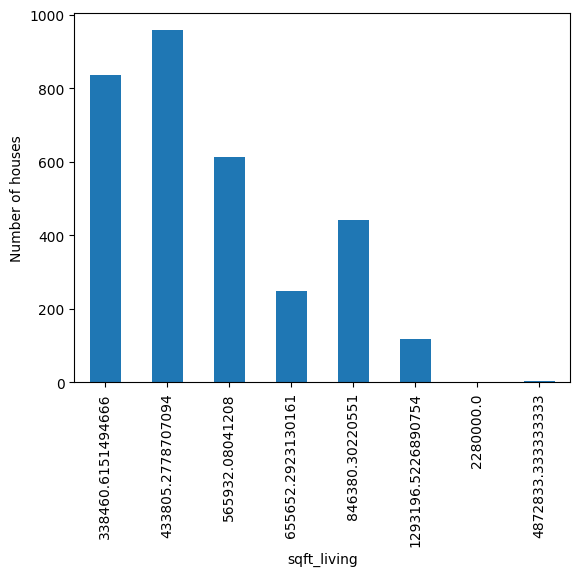

In [6]:
# with tree discretisation, each bin does not necessarily contain
# the same number of observations.
train_t.groupby('sqft_living')['sqft_living'].count().plot.bar()
plt.ylabel('Number of houses')